In [2]:
import networkx as nx
import osmnx as ox
from random import choices
import matplotlib.pyplot as plt

%matplotlib inline
ox.__version__

'1.4.0'

In [3]:
from search_information import SearchInformation

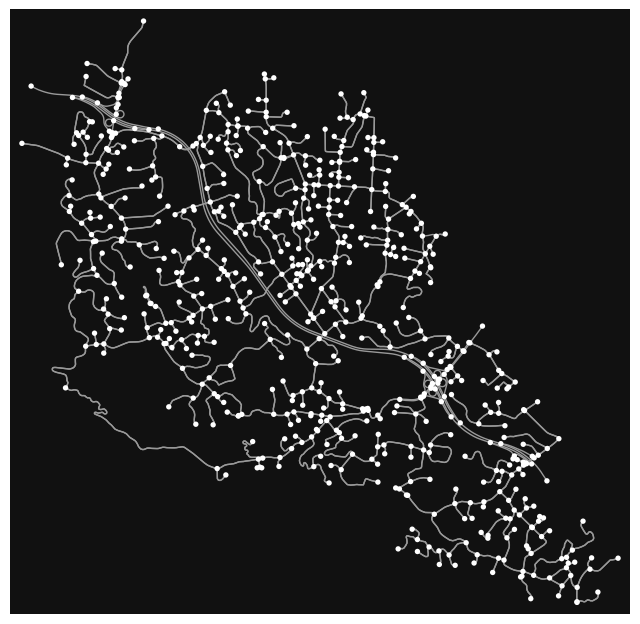

In [4]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place(
    {'city': 'Los Altos Hills', 'state': 'California'}, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G)

Gerar um grafo da cidade de Sanca para teste

In [100]:
oxg = ox.graph_from_point((-22.012282, -47.890821), dist=5000)
# fig, ax = ox.plot_graph(oxg, bgcolor='k', edge_linewidth=3, node_size=0,
#                         show=False, close=False)
# nx.draw(oxg, node_size=30, width=0.1)
# for _, edge in ox.graph_to_gdfs(oxg, nodes=False).fillna('').iterrows():
#     c = edge['geometry'].centroid
#     text = edge['name']
#     ax.annotate(text, (c.x, c.y), c='w')
# plt.show()

In [101]:
list_edge_names = []
for _, edge in ox.graph_to_gdfs(oxg, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    list_edge_names.append(text)

Medidas do grafo gerado

In [112]:
print(len(oxg.nodes()), len(oxg.edges))

8422 21070


Transicao do grafo de Primal para Dual

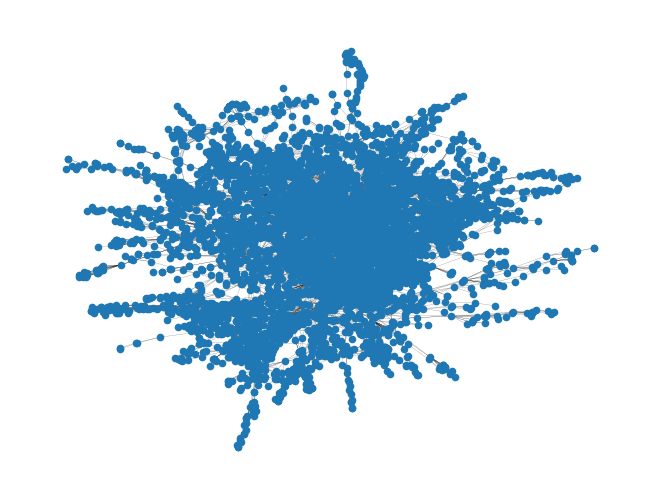

In [105]:
from street_continuity.all import *

primal_graph = from_osmnx(oxg=oxg, use_label=True)
# print(primal_graph.edge_dictionary)
dual_graph = dual_mapper(primal_graph=primal_graph)
# print(dual_graph.edge_dictionary)
nx_dual_graph = nx.Graph()

for edge in dual_graph.edge_dictionary.values():
#     print(edge)
    nx_dual_graph.add_edge(*edge)


# for node in dual_graph.node_dictionary:
#     print(node, dual_graph.node_dictionary[node].names)
    
# nx_dual_graph = nx.k_core(nx_dual_graph, 1)
nx.draw(nx_dual_graph, node_size=20, width=0.1)


Vamos printar id dos nós e as ruas (arestas do Primal) utilizadas para formar esses nós.
Muito unknown? Ruas com mesmo nome não deveriam tornar o mesmo nó? (testar com `dist=300` na geracao do grafo para ver o que acontece)

In [111]:
for node in dual_graph.node_dictionary:
    print(node, dual_graph.node_dictionary[node].names)

0 ['Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís']
1 ['unknown']
2 ['unknown']
3 ['unknown']
4 ['unknown']
5 ['Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington Luís', 'Rodovia Washington 

In [107]:
print(len(list_edge_names))

21070


In [110]:
print(len(nx_dual_graph.nodes()))

5667


In [7]:
G_info = SearchInformation(G)
G_info.compute_average_search_information()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/vitor/Documents/complex-networks-navigation/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_67527/210628340.py", line 2, in <module>
    G_info.compute_average_search_information()
  File "/home/vitor/Documents/complex-networks-navigation/search_information.py", line 70, in compute_average_search_information
    probability_shortest_path_matrix = self.compute_probability_shortest_path_matrix()
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vitor/Documents/complex-networks-navigation/search_information.py", line 40, in compute_probability_shortest_path_matrix
    paths_i_j = list(nx.all_shortest_paths(G,s,t))
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vitor/Documents/complex-networks-navigation/venv/lib/python3.11/site-packages/networkx/algorithm

In [16]:
print(G_info.average_search_information)

In [8]:
random_nodes = choices(list(G.nodes()), k=2)

print(f'Start Node: {random_nodes[0]}\nTarget Node: {random_nodes[1]}')

route = nx.shortest_path(G, random_nodes[0],
                         random_nodes[1], weight='lenght/maxspeed[0]')

ox.plot_graph_route(G, route=route)


In [10]:
nx.plot(G)